# Exercise 7 | Principle Component Analysis and K-Means Clustering



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
from imageio import imread
# Initialization
from ex7func import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Part 1: Find Closest Centroids
To help you implement K-Means, we have divided the learning algorithm
into two functions -- findClosestCentroids and computeCentroids. In this
part, you should complete the code in the findClosestCentroids function.

In [2]:
print('Finding closest centroids.\n\n')
data = scio.loadmat('ex7data2.mat')
X=data['X']
# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples: \n')
print(idx[0:3])
print('\n(the closest centroids should be 0, 2, 1 respectively)\n')

Finding closest centroids.


Closest centroids for the first 3 examples: 

[0 2 1]

(the closest centroids should be 0, 2, 1 respectively)



## Part 2: Compute Means
After implementing the closest centroids function, you should now
complete the computeCentroids function.


Computing centroids means.


Centroids computed after initial finding of closest centroids: 

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




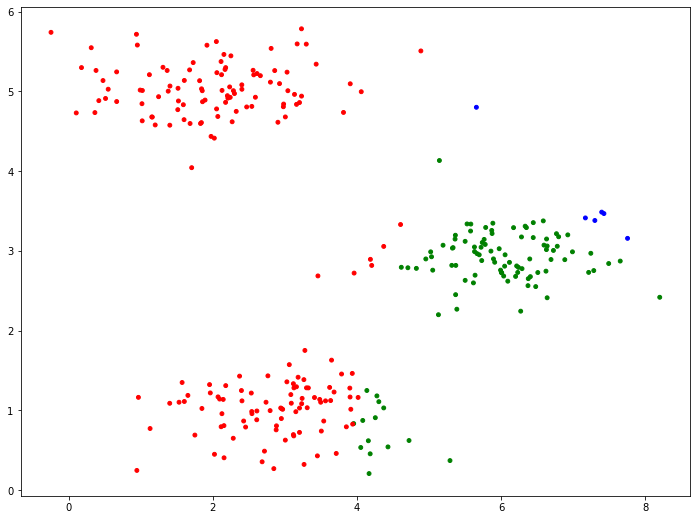

In [3]:
print('\nComputing centroids means.\n\n')
centroids = computeCentroids(X, idx, K)
plotDataPoints(X,idx,K)
print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)
print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')

## Part 3: K-Means Clustering
After you have completed the two functions computeCentroids and
findClosestCentroids, you have all the necessary pieces to run the
kMeans algorithm. In this part, you will run the K-Means algorithm on
the example dataset we have provided.


Running K-Means clustering on example dataset.


K-Means iteration 0/10...

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...


K-Means Done.




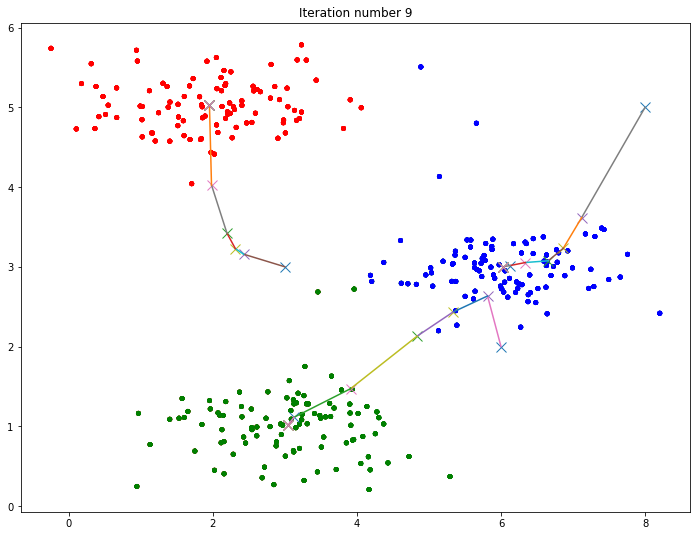

In [4]:
print('\nRunning K-Means clustering on example dataset.\n\n')
max_iters = 10
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('\nK-Means Done.\n\n')

## Part 4: K-Means Clustering on Pixels
In this exercise, you will use K-Means to compress an image. To do this,
you will first run K-Means on the colors of the pixels in the image and
then you will map each pixel onto its closest centroid.

In [5]:
print('\nRunning K-Means clustering on pixels from an image.\n\n')
A=imread('bird_small.png')
A =np.array(A / 255)
X=np.reshape(A,(-1,3),order='F')
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx= runkMeans(X, initial_centroids, max_iters)




Running K-Means clustering on pixels from an image.


K-Means iteration 0/10...

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...



## Part 5: Image Compression
In this part of the exercise, you will use the clusters of K-Means to
compress an image. To do this, we first find the closest clusters for
each example. After that, we


Applying K-Means to compress an image.




Text(0.5, 1.0, 'Compressed, with 16 colors.')

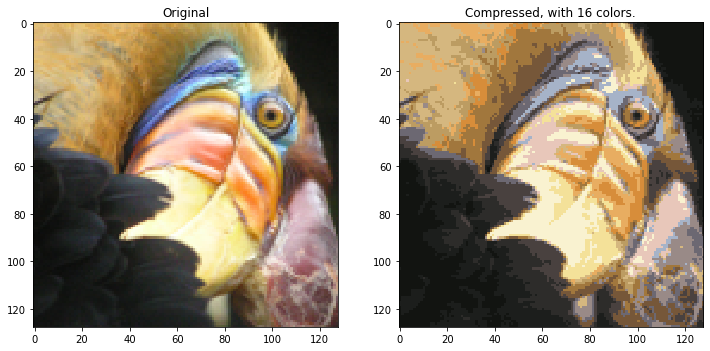

In [6]:
print('\nApplying K-Means to compress an image.\n\n')
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[idx,:]
X_recovered =np.reshape(X_recovered,(-1,3),order='F')
plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(X_recovered.reshape(128,128,3,order='F'))
plt.title('Compressed, with {} colors.'.format(K))